In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# --- Load your JSON training log ---
log_path = "results/results_20250504_155242.json"  # ? Change to your actual JSON file path
with open(log_path, "r") as f:
    records = json.load(f)
# Convert to DataFrame and sort by epoch
df = pd.DataFrame(records)
df = df.sort_values("epoch")
df.head(20)

,final_train_loss,final_val_link_loss,final_val_link_auc,final_val_pr_auc,final_val_cox_loss,c_indices_per_condition,mean_c_index,epoch,NEGATIVE_MULTIPLIER,timestamp
0,0.699573,0.103719,0.814495,0.627509,0.361537,"[None, 0.7507867057216345, None, 0.94828000565...",0.852025,1,3,2025-05-04T14:54:06.940315
1,0.629121,0.099927,0.823914,0.622297,0.338229,"[None, 0.7753598820570415, None, 0.96320446437...",0.883405,2,3,2025-05-04T14:55:19.612514
2,0.608503,0.086052,0.847945,0.732109,0.332700,"[None, 0.7890356750809346, None, 0.97582532365...",0.896022,3,3,2025-05-04T14:56:30.129553
3,0.598460,0.116260,0.841324,0.704958,0.323362,"[None, 0.8044483485786968, None, 0.97871151333...",0.903925,4,3,2025-05-04T14:57:45.164251
4,0.587677,0.098291,0.849294,0.660343,0.350616,"[None, 0.798524701689281, None, 0.959688626184...",0.856929,5,3,2025-05-04T14:58:56.180737
5,0.569444,0.100638,0.843276,0.688811,0.329513,"[None, 0.8010634578390148, None, 0.98278468366...",0.905577,6,3,2025-05-04T15:00:06.018414
6,0.564830,0.086070,0.835004,0.656347,0.323853,"[None, 0.821284672066818, None, 0.982633210200...",0.911685,7,3,2025-05-04T15:01:16.997597
7,0.558024,0.076803,0.848609,0.669448,0.319682,"[None, 0.8192873476168407, None, 0.98685883124...",0.915599,8,3,2025-05-04T15:02:26.965255
8,0.548720,0.077521,0.862899,0.713383,0.321966,"[None, 0.8228971976777884, None, 0.98760184053...",0.914502,9,3,2025-05-04T15:03:37.284714
9,0.525724,0.083748,0.872882,0.715157,0.317842,"[None, 0.8258771334488012, None, 0.98517405541...",0.914805,10,3,2025-05-04T15:04:48.611622


In [14]:
len(df)

50

# --- 1) Plot Train vs. Val Losses ---

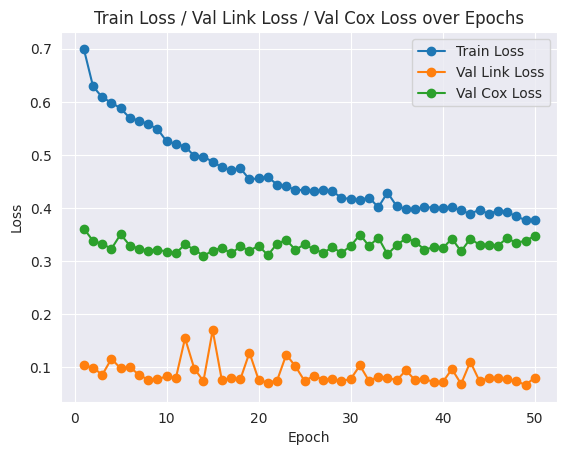

In [15]:
plt.figure()
plt.plot(df["epoch"], df["final_train_loss"], marker='o', linewidth=1.5)
plt.plot(df["epoch"], df["final_val_link_loss"], marker='o', linewidth=1.5)
plt.plot(df["epoch"], df["final_val_cox_loss"], marker='o', linewidth=1.5)
plt.title("Train Loss / Val Link Loss / Val Cox Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train Loss", "Val Link Loss", "Val Cox Loss"])
plt.grid(True)

# --- 2) Plot Link Prediction AUCs ---

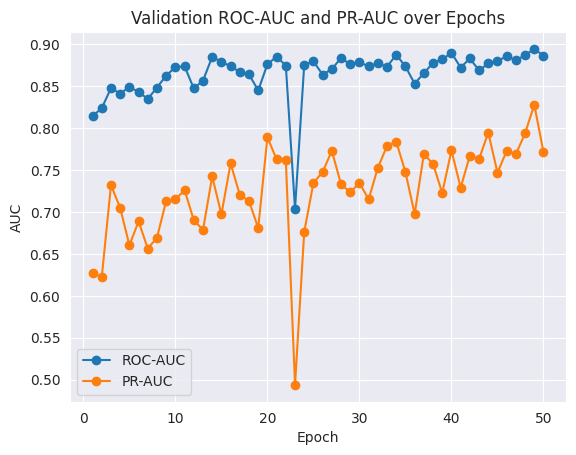

In [16]:
plt.figure()
plt.plot(df["epoch"], df["final_val_link_auc"],  marker='o', linewidth=1.5)
plt.plot(df["epoch"], df["final_val_pr_auc"],    marker='o', linewidth=1.5)
plt.title("Validation ROC-AUC and PR-AUC over Epochs")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend(["ROC-AUC", "PR-AUC"])
plt.grid(True)

# --- 3) Plot Mean C-Index ---

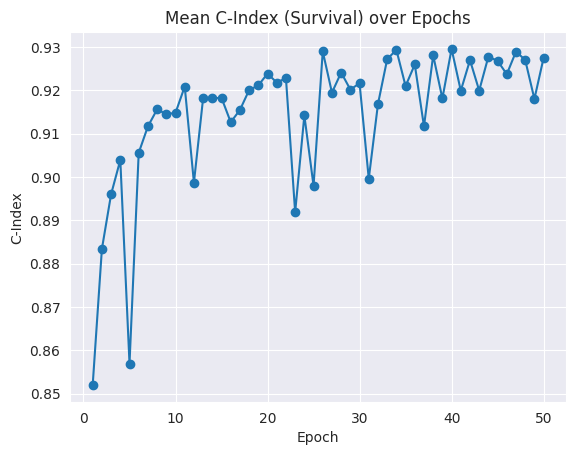

In [17]:
plt.figure()
plt.plot(df["epoch"], df["mean_c_index"], marker='o', linewidth=1.5)
plt.title("Mean C-Index (Survival) over Epochs")
plt.xlabel("Epoch")
plt.ylabel("C-Index")
plt.grid(True)

# --- 4) Per-Condition C-Index and PR-AUC Trends ---

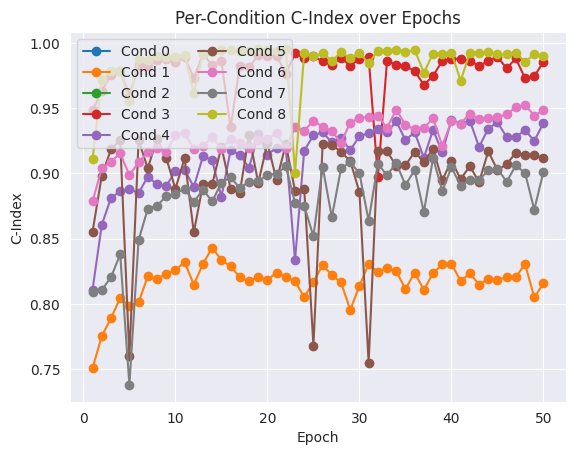

In [18]:
# Expand the list of per-condition c-indices into a DataFrame
cidx_df = pd.DataFrame(df["c_indices_per_condition"].tolist(), index=df["epoch"])
plt.figure()
for cond_idx in cidx_df.columns:
    plt.plot(cidx_df.index, cidx_df[cond_idx], marker='o', linewidth=1.5)
plt.title("Per-Condition C-Index over Epochs")
plt.xlabel("Epoch")
plt.ylabel("C-Index")
plt.legend([f"Cond {i}" for i in cidx_df.columns], loc="upper left", ncol=2)
plt.grid(True)

In [ ]:
# Expand the list of per-condition link pr-auc into a DataFrame
cidx_df = pd.DataFrame(df["pr_auc_per_condition"].tolist(), index=df["epoch"])
plt.figure()
for cond_idx in cidx_df.columns:
    plt.plot(cidx_df.index, cidx_df[cond_idx], marker='o', linewidth=1.5)
plt.title("Per-Condition PR-AUC over Epochs")
plt.xlabel("Epoch")
plt.ylabel("PR-AUC")
plt.legend([f"Cond {i}" for i in cidx_df.columns], loc="upper left", ncol=2)
plt.grid(True)

# --- 5) Display raw DataFrame for inspection ---

In [26]:
df.columns

Index(['final_train_loss', 'final_val_link_loss', 'final_val_link_auc',
       'final_val_pr_auc', 'final_val_cox_loss', 'c_indices_per_condition',
       'mean_c_index', 'epoch', 'NEGATIVE_MULTIPLIER', 'timestamp'],
      dtype='object')

In [27]:
df.head()

,final_train_loss,final_val_link_loss,final_val_link_auc,final_val_pr_auc,final_val_cox_loss,c_indices_per_condition,mean_c_index,epoch,NEGATIVE_MULTIPLIER,timestamp
0,0.699573,0.103719,0.814495,0.627509,0.361537,"[None, 0.7507867057216345, None, 0.94828000565...",0.852025,1,3,2025-05-04T14:54:06.940315
1,0.629121,0.099927,0.823914,0.622297,0.338229,"[None, 0.7753598820570415, None, 0.96320446437...",0.883405,2,3,2025-05-04T14:55:19.612514
2,0.608503,0.086052,0.847945,0.732109,0.332700,"[None, 0.7890356750809346, None, 0.97582532365...",0.896022,3,3,2025-05-04T14:56:30.129553
3,0.598460,0.116260,0.841324,0.704958,0.323362,"[None, 0.8044483485786968, None, 0.97871151333...",0.903925,4,3,2025-05-04T14:57:45.164251
4,0.587677,0.098291,0.849294,0.660343,0.350616,"[None, 0.798524701689281, None, 0.959688626184...",0.856929,5,3,2025-05-04T14:58:56.180737
